---

# <center>1. Data Exploration

In [1]:
#Importing the basic librarires

import os
import time
import math
import scipy
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
from scipy.stats import randint
from scipy.stats import loguniform
from IPython.display import display
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scikitplot.metrics import plot_roc_curve as auc_roc
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,f1_score,roc_auc_score, roc_curve, precision_score, recall_score

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,6]
import warnings   
warnings.filterwarnings('ignore')



In [2]:
#Importing the dataset

df = pd.read_csv('default_data.csv')
df.drop(['ID','year'],axis=1, inplace=True)#drop the non-significant values and noise

labels = ['Non-Defaulter','Defaulter']
features = [i for i in df.columns.values if i not in ['Status']]

original_df = df.copy()
display(df.head())
print('The Dataset consists of {} features & {} samples.'.format(df.shape[1], df.shape[0]))

,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,...,lump_sum_payment,property_value,Secured_by,total_units,income,Credit_Score,age,LTV,Region,Status
0,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,116500,NaN,...,not_lpsm,118000.0,home,1U,1740.0,758,25-34,98.728814,south,1
1,cf,Male,nopre,type2,p1,l1,nopc,b/c,206500,NaN,...,lpsm,NaN,home,1U,4980.0,552,55-64,NaN,North,1
2,cf,Male,pre,type1,p1,l1,nopc,nob/c,406500,4.56,...,not_lpsm,508000.0,home,1U,9480.0,834,35-44,80.019685,south,0
3,cf,Male,nopre,type1,p4,l1,nopc,nob/c,456500,4.25,...,not_lpsm,658000.0,home,1U,11880.0,587,45-54,69.376900,North,0
4,cf,Joint,pre,type1,p1,l1,nopc,nob/c,696500,4.00,...,not_lpsm,758000.0,home,1U,10440.0,602,25-34,91.886544,North,0


The Dataset consists of 24 features & 148670 samples.


In [3]:
#Checking the dtypes of all the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 24 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   loan_limit              145326 non-null  object 
 1   Gender                  148670 non-null  object 
 2   approv_in_adv           147762 non-null  object 
 3   loan_type               148670 non-null  object 
 4   loan_purpose            148536 non-null  object 
 5   Credit_Worthiness       148670 non-null  object 
 6   open_credit             148670 non-null  object 
 7   business_or_commercial  148670 non-null  object 
 8   loan_amount             148670 non-null  int64  
 9   rate_of_interest        112231 non-null  float64
 10  Upfront_charges         109028 non-null  float64
 11  term                    148629 non-null  float64
 12  Neg_ammortization       148549 non-null  object 
 13  interest_only           148670 non-null  object 
 14  lump_sum_payment    

In [4]:
#Checking number of unique rows in each feature
df.nunique().sort_values()

loan_limit                    2
Secured_by                    2
lump_sum_payment              2
interest_only                 2
Neg_ammortization             2
business_or_commercial        2
Status                        2
Credit_Worthiness             2
approv_in_adv                 2
open_credit                   2
loan_type                     3
total_units                   4
Gender                        4
Region                        4
loan_purpose                  4
age                           7
term                         26
rate_of_interest            131
loan_amount                 211
property_value              385
Credit_Score                401
income                     1001
LTV                        8484
Upfront_charges           58271
dtype: int64

In [5]:
num_f = []; cat_f = []; #numerical & categorical features
for i in features:
    if df[i].dtype!=object:
        num_f.append(i)
    else:
        cat_f.append(i)
print('The Dtype Of Dataset: The Datset has {} numerical & {} categorical features.'.format(len(num_f),len(cat_f)))        

The Dtype Of Dataset: The Datset has 8 numerical & 15 categorical features.


In [6]:
#Checking the numerical value list and categorical value list
print('numerical features-->',pd.DataFrame(num_f))
print('\ncategorical features-->',pd.DataFrame(cat_f))

numerical features-->                   0
0       loan_amount
1  rate_of_interest
2   Upfront_charges
3              term
4    property_value
5            income
6      Credit_Score
7               LTV

categorical features-->                          0
0               loan_limit
1                   Gender
2            approv_in_adv
3                loan_type
4             loan_purpose
5        Credit_Worthiness
6              open_credit
7   business_or_commercial
8        Neg_ammortization
9            interest_only
10        lump_sum_payment
11              Secured_by
12             total_units
13                     age
14                  Region


In [7]:
#Checking the stats of all the columns
df.describe()

,loan_amount,rate_of_interest,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status
count,1.486700e+05,112231.000000,109028.000000,148629.000000,1.335720e+05,139520.000000,148670.000000,133572.000000,148670.000000
mean,3.311177e+05,4.045476,3224.996127,335.136582,4.978935e+05,6957.338876,699.789103,72.746457,0.246445
std,1.839093e+05,0.561391,3251.121510,58.409084,3.599353e+05,6496.586382,115.875857,39.967603,0.430942
min,1.650000e+04,0.000000,0.000000,96.000000,8.000000e+03,0.000000,500.000000,0.967478,0.000000
25%,1.965000e+05,3.625000,581.490000,360.000000,2.680000e+05,3720.000000,599.000000,60.474860,0.000000
50%,2.965000e+05,3.990000,2596.450000,360.000000,4.180000e+05,5760.000000,699.000000,75.135870,0.000000
75%,4.365000e+05,4.375000,4812.500000,360.000000,6.280000e+05,8520.000000,800.000000,86.184211,0.000000
max,3.576500e+06,8.000000,60000.000000,360.000000,1.650800e+07,578580.000000,900.000000,7831.250000,1.000000


**Inference:** The stats seem to be fine, let us gain more undestanding by visualising the dataset.

---

# <center> 2. Exploratory Data Analysis (EDA)

0    112031
1     36639
Name: Status, dtype: int64


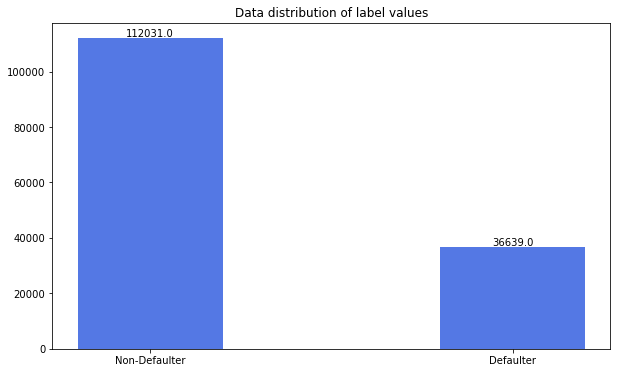

The value Not_default' ———> 0.7535548530302011 of the lables sample

The value 'Default' ———> 0.24644514696979888 of the lables sample


In [8]:
labels_shape = df['Status'].value_counts()
print(labels_shape)

def label_value_distribution(labels_shape):
    plt.bar(labels,labels_shape,width = 0.4,align='center',color = 'royalblue',alpha=0.9)
    for a,b in zip(labels,labels_shape):
            plt.text(a, b+0.05, '%.1f' % b, ha='center', va= 'bottom',fontsize=10)
    plt.title('Data distribution of label values')
    plt.show()
    print("\033[1mThe value Not_default' ———> " + str(labels_shape[0]/df.shape[0])+" of the lables sample")
    print("\n\033[1mThe value 'Default' ———> " + str(labels_shape[1]/df.shape[0])+" of the lables sample")
    
label_value_distribution(labels_shape)

**Inference:** The Target Variable seems to be slightly imbalanced! Hence shall try to perform data augmentation.

                                           Visualising Categorical Features:                                            


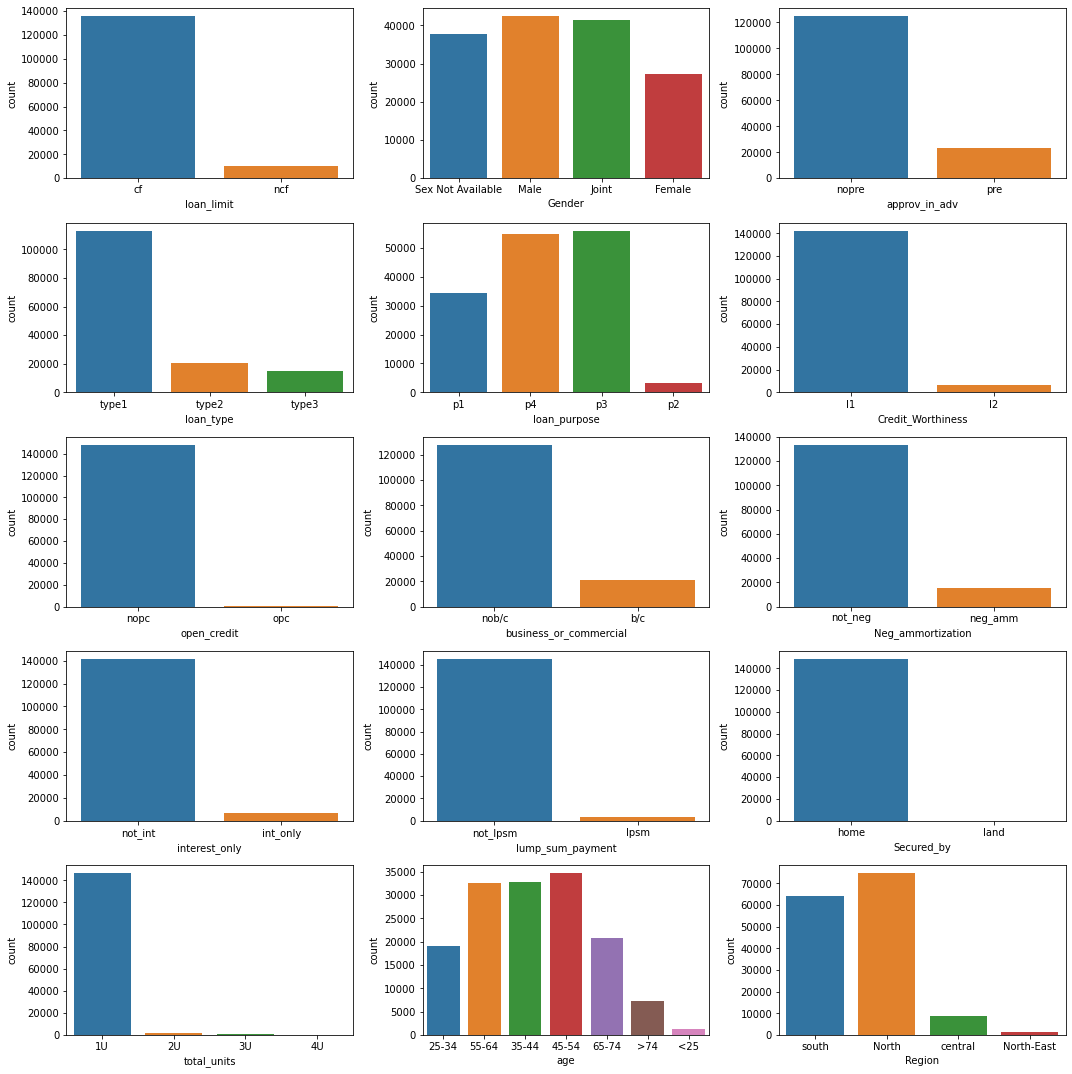

In [9]:
#Visualising the categorical features 

print('Visualising Categorical Features:'.center(120))

n=3
plt.figure(figsize=[15,3*math.ceil(len(cat_f)/n)])

for i in range(len(cat_f)):
    if df[cat_f[i]].nunique()<=12:
        plt.subplot(math.ceil(len(cat_f)/n),n,i+1)
        sns.countplot(df[cat_f[i]])
    else:
        plt.subplot(3,1,i-1)
        sns.countplot(df[cat_f[i]])
plt.tight_layout()
plt.show()

**Inference:** Visualizing the categorical features reveal lot of information about the dataset.

                                                    Features Distribution                                                    


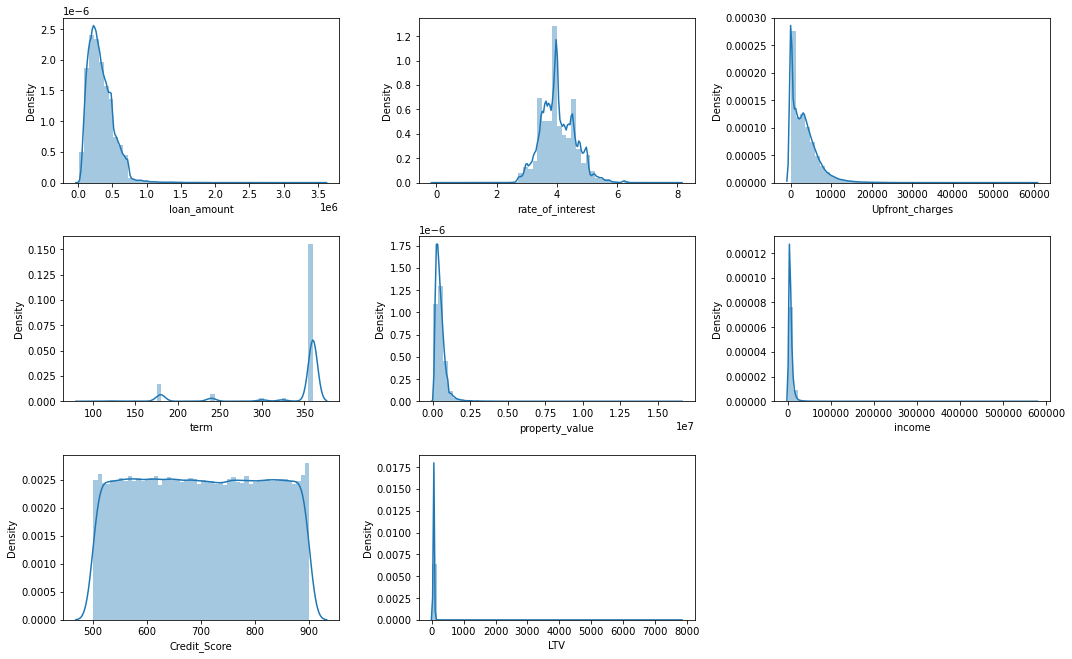

In [10]:
#Understanding the feature set

print('Features Distribution'.center(125))

plt.figure(figsize=[15,3*math.ceil(len(features)/3)])
for i in range(len(num_f)):
    plt.subplot(math.ceil(len(features)/3),3,i+1)
    sns.distplot(df[num_f[i]])
plt.tight_layout()
plt.show()

**Inference:** The data is somewhat normally distributed. And there are many outliers present in the dataset. need fix these outliers..

---

# <center> 3. Data Preprocessing

In [11]:
# Removal of any Duplicate rows (if any)
df_2 = df.copy()
df_2.drop_duplicates(inplace=True)
df_2.reset_index(drop=True,inplace=True)
# checking is there any duplicates in the features
display(df.duplicated(features).value_counts())

False    148669
True          1
dtype: int64

In [12]:
#Check for empty elements

null_values = pd.DataFrame(df_2.isnull().sum().sort_values(), columns=['Total Null Values'])
null_values['Percentage'] = round(null_values['Total Null Values']/df_2.shape[0],3)*100
print(null_values)

                        Total Null Values  Percentage
Status                                  0         0.0
Gender                                  0         0.0
Credit_Score                            0         0.0
loan_type                               0         0.0
total_units                             0         0.0
Credit_Worthiness                       0         0.0
open_credit                             0         0.0
business_or_commercial                  0         0.0
loan_amount                             0         0.0
Secured_by                              0         0.0
lump_sum_payment                        0         0.0
Region                                  0         0.0
interest_only                           0         0.0
term                                   41         0.0
Neg_ammortization                     121         0.1
loan_purpose                          134         0.1
age                                   200         0.1
approv_in_adv               

**Inference:** There are many outliers in the dataset. Let us try to impute the missing values

In [13]:
for i in features:
    if df[i].dtype!=object:
        df[i].fillna(df[i].mean(),inplace=True)
    else:
        df[i].fillna(df[i].mode()[0],inplace=True)
        # because the most_frequent may have multiple values so use the frist one

In [13]:
# Useing API method:
# for i in num_f:
#     SI = SimpleImputer(strategy='mean')
#     df[i] = SI.fit_transform(df[[i]])
    
# for i in cat_f:
#     SI = SimpleImputer(strategy='most_frequent')
#     df[i] = SI.fit_transform(df[[i]])

In [14]:
# checking is there still any null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 24 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   loan_limit              148670 non-null  object 
 1   Gender                  148670 non-null  object 
 2   approv_in_adv           148670 non-null  object 
 3   loan_type               148670 non-null  object 
 4   loan_purpose            148670 non-null  object 
 5   Credit_Worthiness       148670 non-null  object 
 6   open_credit             148670 non-null  object 
 7   business_or_commercial  148670 non-null  object 
 8   loan_amount             148670 non-null  int64  
 9   rate_of_interest        148670 non-null  float64
 10  Upfront_charges         148670 non-null  float64
 11  term                    148670 non-null  float64
 12  Neg_ammortization       148670 non-null  object 
 13  interest_only           148670 non-null  object 
 14  lump_sum_payment    

In [15]:
#Converting categorical Columns to Numeric

df_con = df.copy()
ecc = null_values[null_values['Percentage']!=0].index.values
dcc = [i for i in df.columns if i not in ecc]

#Target Variable
Map={}
for i,x in enumerate(df_con['Status'].unique()):
    Map[x]=i
df_con['Status']=df_con['Status'].map(Map)
print('Mapping Target variable :',Map)

df_3 = df_con[dcc]
fcc = [i for i in cat_f if i not in ecc]

#One-Hot Binay Encoding
oh=True ;dm=True
for i in fcc:
    #print(i)
    if df_3[i].nunique()==2:
        if oh==True: print("\nOne-Hot Encoding on features:")
        print(i);oh=False
        df_3[i]=pd.get_dummies(df_3[i], drop_first=True, prefix=str(i))
    if (df_3[i].nunique()>2 and df_3[i].nunique()<17):
        if dm==True: print("\nDummy Encoding on features:")
        print(i);dm=False
        df_3 = pd.concat([df_3.drop([i], axis=1), pd.DataFrame(pd.get_dummies(df_3[i], drop_first=True, prefix=str(i)))],axis=1)


Mapping Target variable : {1: 0, 0: 1}

Dummy Encoding on features:
Gender
loan_type

One-Hot Encoding on features:
Credit_Worthiness
open_credit
business_or_commercial
interest_only
lump_sum_payment
Secured_by
total_units
Region


In [16]:
#Removal of outlier:
df_4 = df_3.copy()
for i in [i for i in df_4.columns]:
    if df_4[i].nunique()>=12:
        f_1 = df_4[i].quantile(0.20)
        f_2 = df_4[i].quantile(0.80)
        IQR = f_2 - f_1
        df_4 = df_4[df_4[i] <= (f_2+(1.5*IQR))]
        df_4 = df_4[df_4[i] >= (f_1-(1.5*IQR))]
df_4 = df_4.reset_index(drop=True)
display(df_4.head())
# references:https://www.askpython.com/python/examples/detection-removal-outliers-in-python
print('\nBefore drop of outliers original dataset had {} samples.'.format(df_con.shape[0]))
print('\nAfter drop of outliers dataset now has {} samples.'.format(df_4.shape[0]))

,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,term,interest_only,lump_sum_payment,Secured_by,Credit_Score,Status,...,Gender_Male,Gender_Sex Not Available,loan_type_type2,loan_type_type3,total_units_2U,total_units_3U,total_units_4U,Region_North-East,Region_central,Region_south
0,0,0,1,116500,360.0,1,1,0,758,0,...,0,1,0,0,0,0,0,0,0,1
1,0,0,0,206500,360.0,1,0,0,552,0,...,1,0,1,0,0,0,0,0,0,0
2,0,0,1,406500,360.0,1,1,0,834,1,...,1,0,0,0,0,0,0,0,0,1
3,0,0,1,456500,360.0,1,1,0,587,1,...,1,0,0,0,0,0,0,0,0,0
4,0,0,1,696500,360.0,1,1,0,602,1,...,0,0,0,0,0,0,0,0,0,0



Before drop of outliers original dataset had 148670 samples.

After drop of outliers dataset now has 120695 samples.


In [17]:
#Fixing the imbalance using SMOTE

df_5 = df_4.copy()

print('Original class distribution:')
print(df_5['Status'].value_counts())
# print(df_5[:-1].value_counts())

xf = df_5.columns
X = df_5.drop(['Status'],axis=1)
Y = df_5['Status']

smote = SMOTE()
X, Y = smote.fit_resample(X, Y)

df_5 = pd.DataFrame(X, columns=xf)
df_5['Status'] = Y

print('\nClass distribution after SMOTE processing:',)
print(Y.value_counts())
#Note: Only the results of the label values are shown here, as the display of 
#   the feature values is more complicated due to the larger data size.

Original class distribution:
1    91699
0    28996
Name: Status, dtype: int64

Class distribution after SMOTE processing:
0    91699
1    91699
Name: Status, dtype: int64


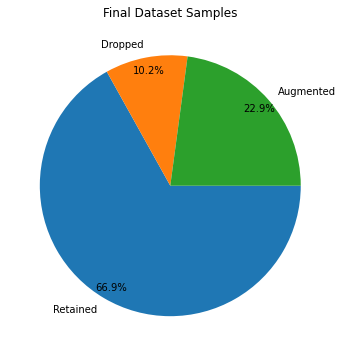


The final dataset after cleanup has 183398 samples & 21 columns.


In [18]:
#Final Dataset size after performing Preprocessing

df = df_5.copy()
plt.title('Final Dataset Samples')
plt.pie([df.shape[0], original_df.shape[0]-df_4.shape[0], df_5.shape[0]-df_4.shape[0]], radius = 1,
        labels=['Retained','Dropped','Augmented'], counterclock=False, autopct='%1.1f%%', pctdistance=0.9, explode=[0,0,0])
# plt.pie([df.shape[0]], labels=['100%'], labeldistance=-0, radius=0.50, colors=['powderblue'])
plt.show()

print('\n\033[1mThe final dataset after cleanup has {} samples & {} columns.'.format(df.shape[0], df.shape[1]))

---

# <center> 4. Data Manipulation

In [19]:
#Splitting the data intro training & testing sets

# df = df5.copy()

feature_values = df.drop(['Status'],axis=1)
Label_values = df['Status']
X_train, X_test, Y_train , Y_test = train_test_split(feature_values, Label_values,test_size=0.2, random_state=0)

print('Original set: ','features->',feature_values.shape,'Lables->',Label_values.shape,
      '\nTraining set:','training features->',X_train.shape,'training labels->',Y_train.shape,
      '\nTesting set:','testing features->', X_test.shape,'testing labels->', Y_test.shape)

Original set:  features-> (183398, 20) Lables-> (183398,) 
Training set: training features-> (146718, 20) training labels-> (146718,) 
Testing set: testing features-> (36680, 20) testing labels-> (36680,)


In [20]:
#Feature Scaling (Standardization)

sc_X= StandardScaler()

X_train = sc_X.fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns=feature_values.columns)
X_test = sc_X.transform(X_test)
X_test = pd.DataFrame(X_test, columns=feature_values.columns)

print('Standardized Training set'.center(115))
display(X_train.head())

print('Standardized Testing set'.center(115))
display(X_test.head())

                                             Standardized Training set                                             


,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,term,interest_only,lump_sum_payment,Secured_by,Credit_Score,Gender_Joint,Gender_Male,Gender_Sex Not Available,loan_type_type2,loan_type_type3,total_units_2U,total_units_3U,total_units_4U,Region_North-East,Region_central,Region_south
0,-0.157172,-0.054216,0.522755,-0.857509,0.0,0.256243,0.254881,-0.013055,0.606413,-0.516101,-0.542915,2.037107,-0.382429,-0.289699,-0.085469,-0.042215,-0.037769,-0.074831,-0.208688,1.341368
1,-0.157172,-0.054216,-1.912941,-0.150428,0.0,0.256243,0.254881,-0.013055,-1.425536,-0.516101,-0.542915,2.037107,2.614861,-0.289699,-0.085469,-0.042215,-0.037769,-0.074831,-0.208688,1.341368
2,-0.157172,-0.054216,0.522755,-0.680739,0.0,0.256243,0.254881,-0.013055,0.589193,-0.516101,1.841907,-0.490892,-0.382429,-0.289699,-0.085469,-0.042215,-0.037769,-0.074831,-0.208688,-0.745508
3,-0.157172,-0.054216,0.522755,-1.623514,0.0,0.256243,0.254881,-0.013055,-1.606345,-0.516101,1.841907,-0.490892,-0.382429,3.451857,-0.085469,-0.042215,-0.037769,-0.074831,-0.208688,-0.745508
4,-0.157172,-0.054216,0.522755,0.910193,0.0,0.256243,0.254881,-0.013055,0.373944,1.937604,-0.542915,-0.490892,-0.382429,-0.289699,-0.085469,-0.042215,-0.037769,-0.074831,4.791846,-0.745508


                                              Standardized Testing set                                             


,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,term,interest_only,lump_sum_payment,Secured_by,Credit_Score,Gender_Joint,Gender_Male,Gender_Sex Not Available,loan_type_type2,loan_type_type3,total_units_2U,total_units_3U,total_units_4U,Region_North-East,Region_central,Region_south
0,-0.157172,-0.054216,-1.912941,-1.152126,0.0,0.256243,0.254881,-0.013055,1.097180,1.937604,-0.542915,-0.490892,2.614861,-0.289699,-0.085469,-0.042215,-0.037769,-0.074831,-0.208688,-0.745508
1,-0.157172,-0.054216,0.522755,-0.150428,0.0,0.256243,0.254881,-0.013055,1.295209,-0.516101,-0.542915,-0.490892,-0.382429,-0.289699,-0.085469,-0.042215,-0.037769,-0.074831,-0.208688,-0.745508
2,-0.157172,-0.054216,0.522755,-0.032581,0.0,0.256243,0.254881,-0.013055,-0.573150,-0.516101,-0.542915,-0.490892,-0.382429,-0.289699,-0.085469,-0.042215,-0.037769,-0.074831,-0.208688,-0.745508
3,-0.157172,-0.054216,0.522755,1.440504,0.0,0.256243,0.254881,-0.013055,1.510458,-0.516101,-0.542915,-0.490892,-0.382429,-0.289699,-0.085469,-0.042215,-0.037769,-0.074831,-0.208688,-0.745508
4,-0.157172,-0.054216,0.522755,-0.680739,0.0,0.256243,0.254881,-0.013055,1.114400,-0.516101,-0.542915,-0.490892,-0.382429,-0.289699,-0.085469,-0.042215,-0.037769,-0.074831,-0.208688,-0.745508


---

# <center> 5. Feature Selection/Extraction

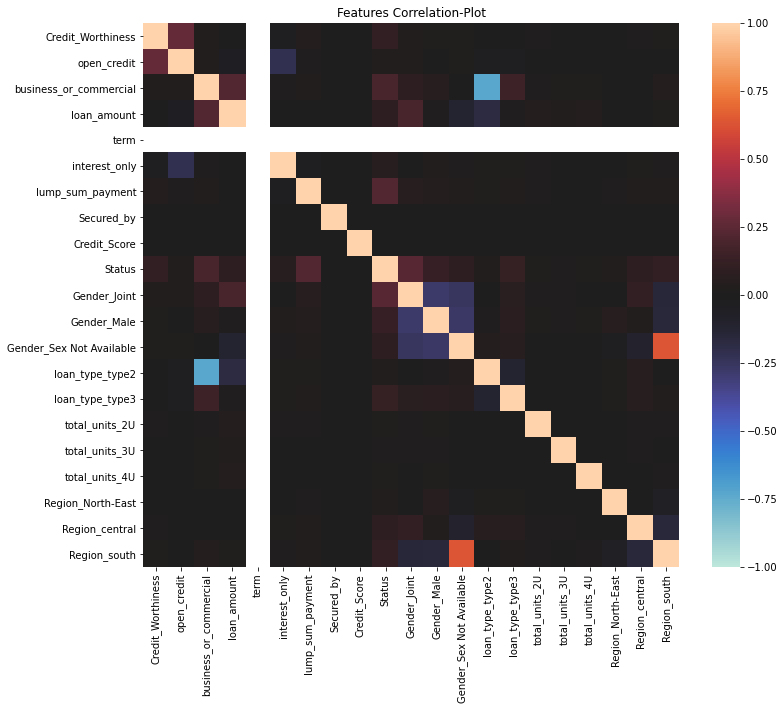

In [21]:
#Checking the correlation
features = df.columns
plt.figure(figsize=[12,10])
plt.title('Features Correlation-Plot')
sns.heatmap(df[features].corr(), vmin=-1, vmax=1, center=0) #, 
plt.show()

In [22]:
pca = PCA(n_components = 'mle')
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
display(pd.DataFrame(explained_variance))
print('\033[1mNow there are {} features and oraginal features is 21'.format(pd.DataFrame(explained_variance).shape[0]))

,0
0,0.101186
1,0.096202
2,0.072274
3,0.069276
4,0.058122
5,0.054972
6,0.053175
7,0.052860
8,0.052617
9,0.052521


Now there are 19 features and oraginal features is 21


# <center> 6. Predictive Modeling

In [23]:
#Let us create first create a table to store the results of various models 
all_models =('Logistic Regression (LR)','Decision Tree Classifier (DT)','Random Forest Classifier (RF)',
                  'Naïve Bayes Classifier (NB)')
Evaluation = pd.DataFrame(np.zeros((4,5)), columns=['Accuracy', 'Precision','Recall','F1-score','AUC-ROC score'])
Evaluation.index=['Logistic Regression (LR)','Decision Tree Classifier (DT)','Random Forest Classifier (RF)',
                  'Naïve Bayes Classifier (NB)']
Evaluation

,Accuracy,Precision,Recall,F1-score,AUC-ROC score
Logistic Regression (LR),0.0,0.0,0.0,0.0,0.0
Decision Tree Classifier (DT),0.0,0.0,0.0,0.0,0.0
Random Forest Classifier (RF),0.0,0.0,0.0,0.0,0.0
Naïve Bayes Classifier (NB),0.0,0.0,0.0,0.0,0.0


In [24]:
#Let us define functions to summarise the Prediction's scores .

#Classification Summary Function
def Classification_Summary(Y_pred,pred_prob,i):
    Evaluation.iloc[i]['Accuracy']=round(accuracy_score(Y_test, Y_pred),3)*100   
    Evaluation.iloc[i]['Precision']=round(precision_score(Y_test, Y_pred, average='weighted'),3)*100 #
    Evaluation.iloc[i]['Recall']=round(recall_score(Y_test, Y_pred, average='weighted'),3)*100 #
    Evaluation.iloc[i]['F1-score']=round(f1_score(Y_test, Y_pred, average='weighted'),3)*100 #
    Evaluation.iloc[i]['AUC-ROC score']=round(roc_auc_score(Y_test, pred_prob[:, 1], multi_class='ovr'),3)*100 #[:, 1]
    print('{}{}\033[1m Evaluating {} \033[0m{}{}\n'.format('<'*3,'-'*25,Evaluation.index[i], '-'*25,'>'*3))
    print('Accuracy = {}%'.format(round(accuracy_score(Y_test, Y_pred),3)*100))
    print('F1 Score = {}%'.format(round(f1_score(Y_test, Y_pred, average='weighted'),3)*100)) #
    print('\n \033[1mConfusiton Matrix:\033[0m\n',confusion_matrix(Y_test, Y_pred))
    print('\n\033[1mClassification Report:\033[0m\n',classification_report(Y_test, Y_pred))
    #reference:https://towardsdatascience.com/machine-learning-predicting-bank-loan-defaults-d48bffb9aee2
    auc_roc(Y_test, pred_prob, curves=['each_class'])
    plt.show()

#Visualising Function
def AUC_ROC_plot(Y_test, Y_pred):    
    ref = [0 for _ in range(len(Y_test))]
    ref_auc = roc_auc_score(Y_test, ref)
    lr_auc = roc_auc_score(Y_test, Y_pred)

    ns_fpr, ns_tpr, _ = roc_curve(Y_test, ref)
    lr_fpr, lr_tpr, _ = roc_curve(Y_test, Y_pred)

    plt.plot(ns_fpr, ns_tpr, linestyle='--')
    plt.plot(lr_fpr, lr_tpr, marker='.', label='AUC = {}'.format(round(roc_auc_score(Y_test, Y_pred)*100,2))) 
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()
    #reference:https://towardsdatascience.com/machine-learning-predicting-bank-loan-defaults-d48bffb9aee2

---

## 1. Logistic Regression:

<<<------------------------- Evaluating Logistic Regression (LR) ------------------------->>>

Accuracy = 72.5%
F1 Score = 72.3%

 Confusiton Matrix:
 [[11800  6661]
 [ 3420 14799]]

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.64      0.70     18461
           1       0.69      0.81      0.75     18219

    accuracy                           0.73     36680
   macro avg       0.73      0.73      0.72     36680
weighted avg       0.73      0.73      0.72     36680



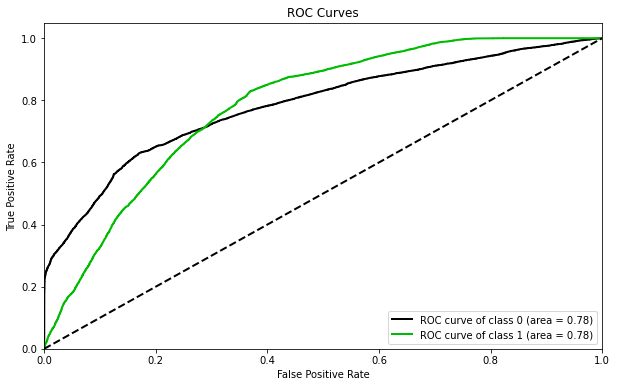

Running time: 0.25690197944641113 Seconds


In [25]:
# Building Logistic Regression Classifier
LR_classifier = LogisticRegression()
start_time_LR=time.time()
param_dist={"solver":['newton-cg', 'lbfgs', 'liblinear'],
           "penalty":['l2','l1']}
# RandomizedsearchCV optimization parameters
clf = RandomizedSearchCV(LR_classifier, param_dist, n_iter=50, scoring='roc_auc', n_jobs=-1, cv=10, random_state=0)

LR = LR_classifier.fit(X_train, Y_train)
Y_pred = LR.predict(X_test)
pred_prob = LR.predict_proba(X_test)
end_time_LR=time.time()
total_time_LR=end_time_LR-start_time_LR
Classification_Summary(Y_pred,pred_prob,0)
print('Running time: %s Seconds'%total_time_LR)

---

## 2. Decisoin Tree Classfier:

<<<------------------------- Evaluating Decision Tree Classifier (DT) ------------------------->>>

Accuracy = 71.89999999999999%
F1 Score = 71.89999999999999%

 Confusiton Matrix:
 [[13861  4600]
 [ 5704 12515]]

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.75      0.73     18461
           1       0.73      0.69      0.71     18219

    accuracy                           0.72     36680
   macro avg       0.72      0.72      0.72     36680
weighted avg       0.72      0.72      0.72     36680



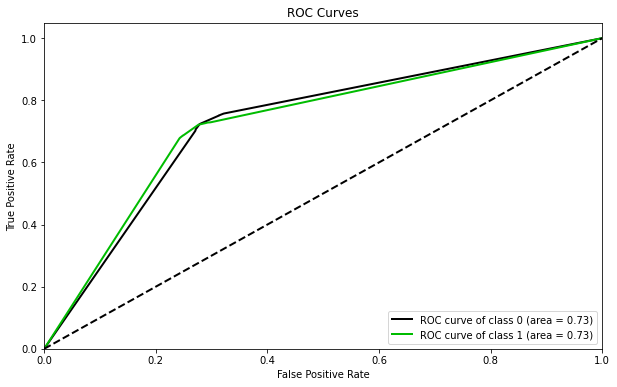

Running time: 6.237635850906372 Seconds


In [26]:
#Building Decision Tree Classifier

DT_classifier = DecisionTreeClassifier()
start_time_DT=time.time()
param_dist = {"max_depth": [3, 5, 7, None],
              "max_features": randint(1, len(features)-1),
              "min_samples_leaf": randint(1, len(features)-1),
              "criterion": ["gini", "entropy"]}
RCV = RandomizedSearchCV(DT_classifier, param_dist, n_iter=50, scoring='roc_auc', n_jobs=-1, cv=10, random_state=1)
# RandomizedsearchCV optimization parameters
DT = DT_classifier.fit(X_train, Y_train)
Y_pred = DT.predict(X_test)
pred_prob = DT.predict_proba(X_test)
end_time_DT=time.time()
total_time_DT=end_time_DT-start_time_DT
Classification_Summary(Y_pred,pred_prob,1)
print('Running time: %s Seconds'%total_time_DT)

---

## 3. Random Forest Classfier:

<<<------------------------- Evaluating Random Forest Classifier (RF) ------------------------->>>

Accuracy = 74.2%
F1 Score = 74.2%

 Confusiton Matrix:
 [[13806  4655]
 [ 4803 13416]]

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.75      0.74     18461
           1       0.74      0.74      0.74     18219

    accuracy                           0.74     36680
   macro avg       0.74      0.74      0.74     36680
weighted avg       0.74      0.74      0.74     36680



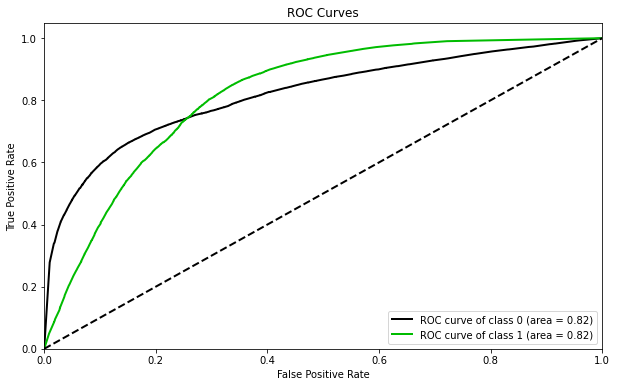

Running time: 72.31188488006592 Seconds


In [27]:
# Building Random-Forest Classifier

RF_classifier = RandomForestClassifier()
start_time_RF=time.time()
param_dist={'bootstrap': [True, False],
            'max_depth': [10, 20, 50, 100, None],
            'max_features': ['auto', 'sqrt'],
            'min_samples_leaf': [1, 2, 4],
            'min_samples_split': [2, 5, 10],
            'n_estimators': [50, 100],
            'criterion': ["gini", "entropy"]}
  
RCV = RandomizedSearchCV(RF_classifier, param_dist, n_iter=50, scoring='roc_auc', n_jobs=-1, cv=10, random_state=0)
# RandomizedsearchCV optimization parameters
RF = RF_classifier.fit(X_train, Y_train)
Y_pred = RF.predict(X_test)
pred_prob = RF.predict_proba(X_test)
end_time_RF =time.time()
total_time_RF=end_time_RF-start_time_RF
Classification_Summary(Y_pred,pred_prob,2)
print('Running time: %s Seconds'%total_time_RF)

---

## 4. Naive Bayes Classfier:

<<<------------------------- Evaluating Naïve Bayes Classifier (NB) ------------------------->>>

Accuracy = 68.10000000000001%
F1 Score = 67.60000000000001%

 Confusiton Matrix:
 [[10363  8098]
 [ 3604 14615]]

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.56      0.64     18461
           1       0.64      0.80      0.71     18219

    accuracy                           0.68     36680
   macro avg       0.69      0.68      0.68     36680
weighted avg       0.69      0.68      0.68     36680



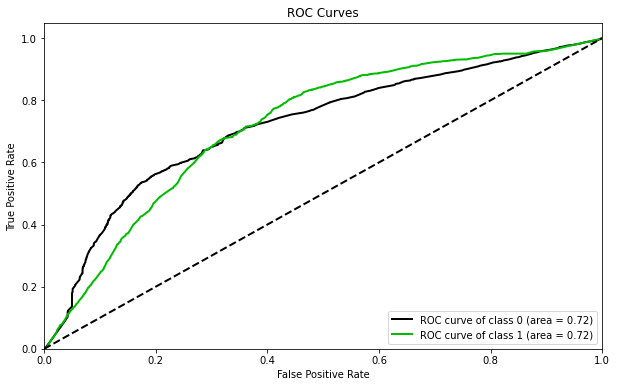

Running time: 0.08776283264160156 Seconds


In [28]:
# Building Naive Bayes Classifier

NB_classifier = BernoulliNB()
start_time_NB = time.time()
# Because the current data is discrete and there are only two classifications (default or non-default) so use Bernoulli()
param_dist = {'alpha': [0.01, 0.1, 0.5, 1.0],
              'fit_prior':['True', 'False']}

RCV = RandomizedSearchCV(NB_classifier, param_dist, n_iter=50, scoring='roc_auc', n_jobs=-1, cv=10, random_state=0)
# RandomizedsearchCV optimization parameters
NB = NB_classifier.fit(X_train, Y_train)
Y_pred = NB.predict(X_test)
pred_prob = NB.predict_proba(X_test)
end_time_NB=time.time()
total_time_NB=end_time_NB-start_time_NB
Classification_Summary(Y_pred,pred_prob,3)
print('Running time: %s Seconds'%total_time_NB)

---

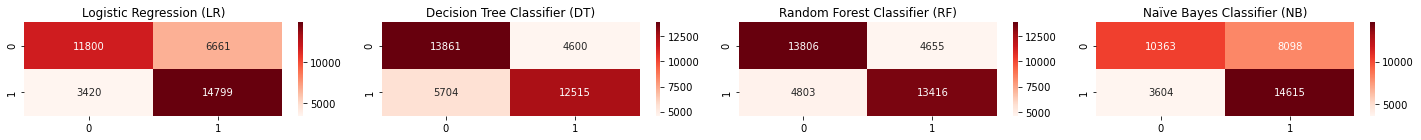

In [29]:
#Plotting Confusion-Matrix of all the predictive Models
    
def conf_mat_plot(all_models):
    plt.figure(figsize=[20,3.5*math.ceil(len(all_models)*len(labels)/14)])
    
    for i in range(len(all_models)):
        if len(labels)<=4:
            plt.subplot(2,4,i+1)
        else:
            plt.subplot(math.ceil(len(all_models)/3),3,i+1)
        pred = all_models[i].predict(X_test)
        #plot_cm(Y_test, pred)
        sns.heatmap(confusion_matrix(Y_test, pred), annot=True, cmap='Reds',fmt='.0f') 
        plt.title(Evaluation.index[i])
    plt.tight_layout()
    plt.show()

conf_mat_plot([LR,DT,RF,NB])

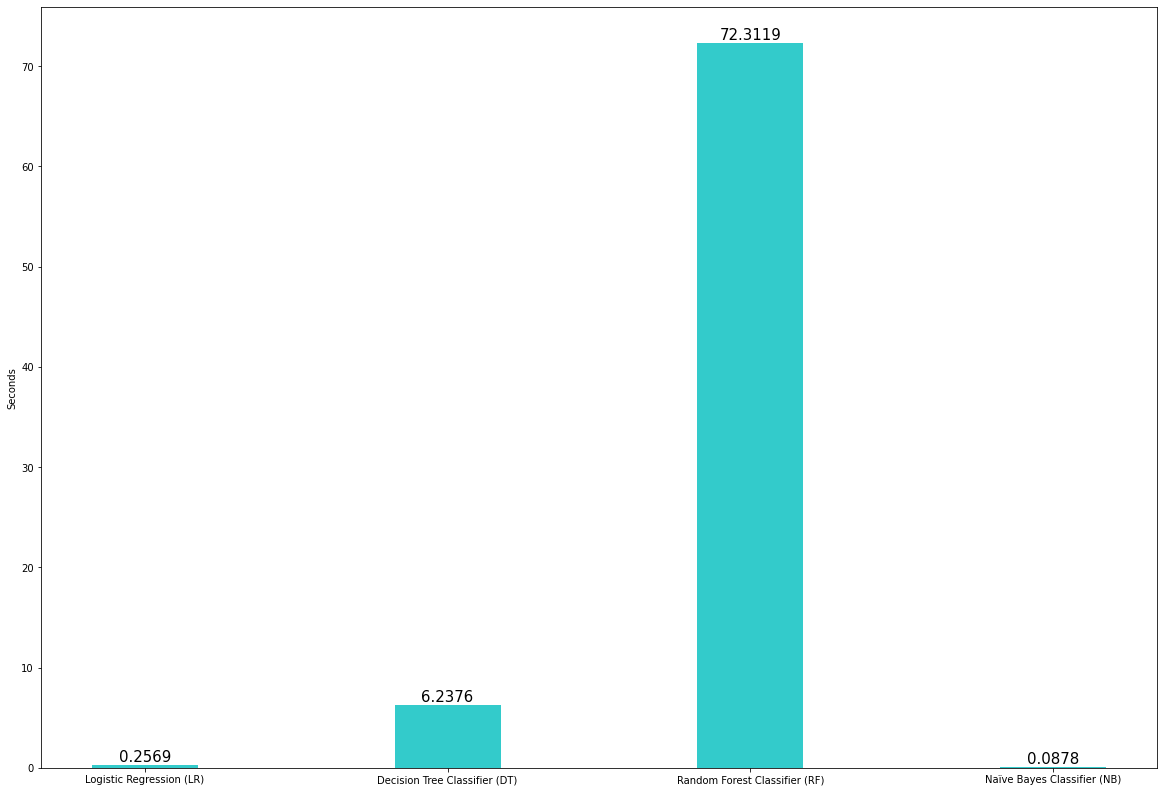

In [30]:
#Create a model to show the time spent on the graph
time_models=[total_time_LR,total_time_DT,total_time_RF,total_time_NB]
performance=[]
def time_cost_bar(all_models):
    for i in time_models:
        performance.append(i)
    plt.figure(figsize=[20,3.5*math.ceil(len(all_models))])
    plt.bar(all_models,performance,width = 0.35,align='center',color = 'c',alpha=0.8)
    plt.ylabel('Seconds')
    for a,b in zip(all_models,performance):
        plt.text(a, b+0.05, '%.4f' % b, ha='center', va= 'bottom',fontsize=15)
    return(plt.show())
time_cost_bar(all_models)

                                                ML Algorithms Comparison                                                


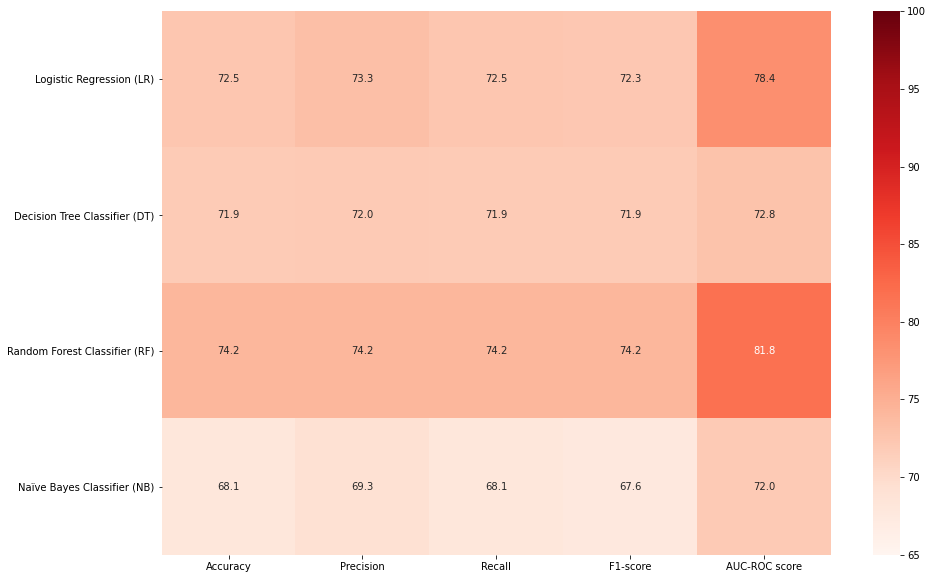

In [31]:
#Comparing all the models Scores
print('ML Algorithms Comparison'.center(120))
plt.figure(figsize=[15,10])
sns.heatmap(Evaluation, annot=True, vmin=65, vmax=100, cmap='Reds', fmt='.1f')
plt.show()

**Insights:** For the current problem statement, it is more important to focus on the F1-score.can note from the above heatmap that the Boosting & RandomForest Models Performed well on the current dataset...

---

# <center> 7. Project Outcomes & Conclusions

## Here are some of the key outcomes of the project:
- The Dataset was large enough summing around 1.5 lakh samples & after preprocessing 31.8% of the datasamples were dropped. 
- The samples were slightly imbalanced after processing, hence SMOTE Technique was applied on the data to  balance the classes, adding 15.5% more samples to the dataset.
- Visualising the distribution of data & their relationships, helped us to get some insights on the relationship between the feature-set.
- Feature Selection/Eliminination was carried out and appropriate features were shortlisted.
- Testing multiple algorithms with fine-tuning hyperparamters gave us some understanding on the model performance for various algorithms on this specific dataset.
- The & Random Forest Classifier performed exceptionally well on the current dataset, considering F1-score as the key-metric.
- Yet it wise to also consider simpler model like Logistic Regression as it is more generalisable & is computationally less expensive, but comes at the cost of slight misclassifications.

In [ ]:
#<<<---------------------------------------------THE END----------------------------------------------------------------->>>